<p>Note: The previous samples in this notebook have been moved to ResearchSamples to avoid cluttering this one.</p>

<h3>Random probability definitions:</h3>
<p>
The data we have observed is our "likelyhood". Information from our personal experience is our "prior probability". In this case the likeyhood would be the conversion rate for an ad based on the results of an iteration while the prior probability is an average overall click rate from some sort of prior knowledge, or can be unknown. 
</p>
<p>
<strong>Posterior Distribution</strong>: The combination of our likelyhood and our prior probability. It is calculated by adding the Beta distributions of each:<br>
Beta(a,b) = Beta(a1 + a2, b1 + b2) <br>
Where a1,b1 are the likelyhood values and a2,b2 are the prior values.
</p>
<p>
As you collect more data, the effect of the prior on our confidence in the solution is reduced. 
</p>

In the "train" dataset, grouping the rows by date would give a good distribution of records. 
Here are the results of counting the number of rows for each date contained in that dataset:

<table>
  <thead>
    <tr>
      <th>Date</th>
      <th># Rows</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1021</td><td>4122995</td>
    </tr>
    <tr>
      <td>1022</td><td>5337126</td>
    </tr>
    <tr>
      <td>1023</td><td>3870752</td>
    </tr>
    <tr>
      <td>1024</td><td>3335302</td>
    </tr>
    <tr>
      <td>1025</td><td>3363122</td>
    </tr>
    <tr>
      <td>1026</td><td>3835892</td>
    </tr>
    <tr>
      <td>1027</td><td>3225010</td>
    </tr>
    <tr>
      <td>1028</td><td>5287222</td>
    </tr>
    <tr>
      <td>1029</td><td>3832608</td>
    </tr>
    <tr>
      <td>1030</td><td>4218938</td>
    </tr>
    <tr>
      <td>Total:</td><td>40428967</td>
    </tr>
  </tbody>
</table>	

In [1]:
# Begin production code
# Importing required libraries for production run
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

# Some plot style defaults
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# Function to plot the standard beta distribution 
def plot_beta(x_range, a, b, pdf=True, **kwargs):
  x = x_range
  if pdf:
    # probability density function
    y = ss.beta.pdf(x,a,b)
  else:
    # cumulative density function
    y = ss.beta.cdf(x,a,b)

  plt.plot(x, y, **kwargs)

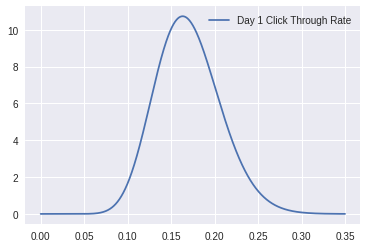

In [4]:
# Day 1 total records: 4122995
# Day 1 total clicks: 718218
# Day 1 click through rate 17%. This will be used to set the starting points for the simulation.
# A CTR of 17% with 1000 rows would result in 170 "wins" and "830" losses. These will be used
# as the initial alpha and beta values. 
initial_alpha = 17
initial_beta = 83

# Plot the probability density curve for an overall click through rate of 17% 
x = np.linspace(0,.35,5000)
plot_beta(x, initial_alpha,initial_beta, label='Day 1 Click Through Rate')
plt.legend()

In [5]:
#Class to hold the properties for each ad campaign
class AdCampaign():
  def __init__(self, campaign_id):
    self.id = campaign_id
    
    #positive observations(clicks)
    self.clicks = 0
    #negative observations(impressions - clicks)
    self.no_clicks = 0

    self.prior_alpha = initial_alpha
    self.prior_beta = initial_beta

  #return total number of impressions for this campaign
  def total_impressions(self):
    return self.clicks + self.no_clicks

  #return a sample from the posterior distribution
  def sample(self):
    return np.random.beta(self.prior_alpha, self.prior_beta)

  def compute_posterior(self):
    self.prior_alpha = self.prior_alpha + self.clicks
    self.prior_beta = self.prior_beta + self.no_clicks

  def update_observations(self, clicks, impressions):
    self.clicks = clicks
    self.no_clicks = impressions - clicks

  def reset_clicks(self):
    self.clicks = 0
    self.no_clicks = 0

In [6]:
# Initialize each ad campaign, then add it to the collection. Each ad displayed at an equal rate of 20% in a round robin fashion.
# The update_observations(clicks, impressions) values are from the day 1 data at hour 00
campaigns = []

campaign = AdCampaign(1)
campaign.update_observations(4242,23802) 
campaigns.append(campaign)

campaign = AdCampaign(2)
campaign.update_observations(3960,23801) 
campaigns.append(campaign)

campaign = AdCampaign(3)
campaign.update_observations(4209,23801) 
campaigns.append(campaign)

campaign = AdCampaign(4)
campaign.update_observations(4130,23801) 
campaigns.append(campaign)

campaign = AdCampaign(5)
campaign.update_observations(4251,23801) 
campaigns.append(campaign)

print('Initial state of each campaign at their creation:')
for c in campaigns:
  print('Campaign {0}: prior_alpha: {1}, prior_beta: {2}, clicks: {3}, no_clicks: {4}, impressions: {5}'.format(c.id, c.prior_alpha, c.prior_beta, c.clicks, c.no_clicks, c.total_impressions()))

Initial state of each campaign at their creation:
Campaign 1: prior_alpha: 17, prior_beta: 83, clicks: 4242, no_clicks: 19560, impressions: 23802
Campaign 2: prior_alpha: 17, prior_beta: 83, clicks: 3960, no_clicks: 19841, impressions: 23801
Campaign 3: prior_alpha: 17, prior_beta: 83, clicks: 4209, no_clicks: 19592, impressions: 23801
Campaign 4: prior_alpha: 17, prior_beta: 83, clicks: 4130, no_clicks: 19671, impressions: 23801
Campaign 5: prior_alpha: 17, prior_beta: 83, clicks: 4251, no_clicks: 19550, impressions: 23801


In [7]:
# Compute the posteriors for each class, then reset the click and impression counts back to 
# zero in preperation for being run through the simulation.

for c in campaigns:
    c.compute_posterior()
    c.reset_clicks()

print('State of each campaign after computing the posterior values from day 1 hour 00. Note: The clicks, no_clicks, and impressions columns are intentionally reset to 0 at the start of the simulation.')
for c in campaigns:
  print('Campaign {0}: prior_alpha: {1}, prior_beta: {2}, clicks: {3}, no_clicks: {4}, impressions: {5}'.format(c.id, c.prior_alpha, c.prior_beta, c.clicks, c.no_clicks, c.total_impressions()))

State of each campaign after computing the posterior values from day 1 hour 00. Note: The clicks, no_clicks, and impressions columns are intentionally reset to 0 at the start of the simulation.
Campaign 1: prior_alpha: 4259, prior_beta: 19643, clicks: 0, no_clicks: 0, impressions: 0
Campaign 2: prior_alpha: 3977, prior_beta: 19924, clicks: 0, no_clicks: 0, impressions: 0
Campaign 3: prior_alpha: 4226, prior_beta: 19675, clicks: 0, no_clicks: 0, impressions: 0
Campaign 4: prior_alpha: 4147, prior_beta: 19754, clicks: 0, no_clicks: 0, impressions: 0
Campaign 5: prior_alpha: 4268, prior_beta: 19633, clicks: 0, no_clicks: 0, impressions: 0


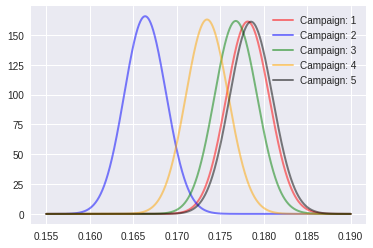

In [8]:
# Plot the initial distribution curve of each ad based the uniform distribution at day 1 hour 00
x = np.linspace(.155,.190,5000)

plot_beta(x, campaigns[0].prior_alpha,campaigns[0].prior_beta, color='red', lw=2, alpha=0.5, label='Campaign: 1')
plot_beta(x, campaigns[1].prior_alpha,campaigns[1].prior_beta, color='blue', lw=2, alpha=0.5, label='Campaign: 2')
plot_beta(x, campaigns[2].prior_alpha,campaigns[2].prior_beta, color='green', lw=2, alpha=0.5, label='Campaign: 3')
plot_beta(x, campaigns[3].prior_alpha,campaigns[3].prior_beta, color='orange', lw=2, alpha=0.5, label='Campaign: 4')
plot_beta(x, campaigns[4].prior_alpha,campaigns[4].prior_beta, color='black', lw=2, alpha=0.5, label='Campaign: 5')

plt.legend()

In [9]:
# Function to try the selected campaign to determine whether or not it was clicked.
def try_campaign(campaign, beta_val):
  # np.random.random returns a random value between 0 and 1
  if np.random.random() <= beta_val:
    campaign.clicks += 1
  else:
    campaign.no_clicks += 1

In [19]:
# Run the simulation 
# Set the total number of trials
NUM_TRIALS = 119006 
#200028  #This is the total impressions for the hour being simulated

# Function to reset the clicks / no clicks properties of each campaign while
# maintaining the same priors
for c in campaigns:
  c.reset_clicks()
  #print('prior_alpha: {0}'.format(c.prior_alpha));
  #print('prior_beta: {0}'.format(c.prior_beta));

for i in range(NUM_TRIALS):
  best_campaign_id = -1
  maxsample = -1
  # allsamples = []
  
  # Sample each campaign for this trial
  for c in campaigns:
    # Get the beta sample for this campaign
    current_campaign_sample = c.sample()
    # Compare the beta value for this campaign to the 
    # max value seen so far. If it is greater, set it 
    # as the new max and record the campaign id with the 
    # best beta value for this trial. 
    if current_campaign_sample > maxsample:
      maxsample = current_campaign_sample
      best_campaign_id = c.id

  # Show the selected campaign and determine whether or not it was clicked.
  try_campaign(campaigns[best_campaign_id - 1], maxsample)

traffic_percentage = {}
for c in campaigns:
  c.compute_posterior()
  traffic_percentage = float(c.total_impressions()) / NUM_TRIALS
  print('Campaign {0}'.format(c.id))
  print('Number of times chosen with best beta value (e.g. impressions):{0}'.format((c.clicks + c.no_clicks)))
  print('Clicks: {0}, No Clicks: {1}'.format(c.clicks, c.no_clicks))
  print('Updated prior_alpha: {0}'.format(c.prior_alpha));
  print('Updated prior_beta: {0}'.format(c.prior_beta));
  print(f'Suggested traffic percentage for next iteration: {traffic_percentage:.1%}')
  print('')

Campaign 1
Number of times chosen with best beta value (e.g. impressions):53140
Clicks: 9779, No Clicks: 43361
Updated prior_alpha: 98500
Updated prior_beta: 441832
Suggested traffic percentage for next iteration: 44.7%

Campaign 2
Number of times chosen with best beta value (e.g. impressions):0
Clicks: 0, No Clicks: 0
Updated prior_alpha: 3977
Updated prior_beta: 19924
Suggested traffic percentage for next iteration: 0.0%

Campaign 3
Number of times chosen with best beta value (e.g. impressions):363
Clicks: 58, No Clicks: 305
Updated prior_alpha: 8880
Updated prior_beta: 41163
Suggested traffic percentage for next iteration: 0.3%

Campaign 4
Number of times chosen with best beta value (e.g. impressions):9
Clicks: 0, No Clicks: 9
Updated prior_alpha: 4545
Updated prior_beta: 21642
Suggested traffic percentage for next iteration: 0.0%

Campaign 5
Number of times chosen with best beta value (e.g. impressions):65494
Clicks: 12032, No Clicks: 53462
Updated prior_alpha: 100332
Updated prior

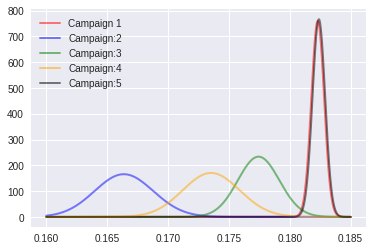

In [20]:
# Plot the updated distribution results of each ad

x = np.linspace(.160,.185,5000)

plot_beta(x, campaigns[0].prior_alpha,campaigns[0].prior_beta, color='red', lw=2, alpha=0.5, label='Campaign 1')
plot_beta(x, campaigns[1].prior_alpha,campaigns[1].prior_beta, color='blue', lw=2, alpha=0.5, label='Campaign:2')
plot_beta(x, campaigns[2].prior_alpha,campaigns[2].prior_beta, color='green', lw=2, alpha=0.5, label='Campaign:3')
plot_beta(x, campaigns[3].prior_alpha,campaigns[3].prior_beta, color='orange', lw=2, alpha=0.5, label='Campaign:4')
plot_beta(x, campaigns[4].prior_alpha,campaigns[4].prior_beta, color='black', lw=2, alpha=0.5, label='Campaign:5')

plt.legend()
  

prior_alpha: 47042
prior_beta: 213457
prior_alpha: 3978
prior_beta: 19925
prior_alpha: 15548
prior_beta: 71582
prior_alpha: 5078
prior_beta: 24273
prior_alpha: 67373
prior_beta: 307525
